In [7]:
# IMPORTS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [9]:
# DATA LOADING & PREPROCESSING
df = pd.read_csv(r"C:\Users\DELL\credit-card-fraud-detection\data\creditcard.csv")

In [10]:
# FEATURE SCALING
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [11]:
# DATA SPLITTING
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# RESAMPLING
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [13]:
print("Data preparation complete. The following variables are ready:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data preparation complete. The following variables are ready:
X_train_resampled shape: (454902, 30)
y_train_resampled shape: (454902,)
X_test shape: (56962, 30)
y_test shape: (56962,)


In [14]:
# IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
# EVALUATION FUNCTION
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print("-" * (len(model_name) + 20) + "\n")

--- Logistic Regression Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


ROC AUC Score: 0.9699

Confusion Matrix:


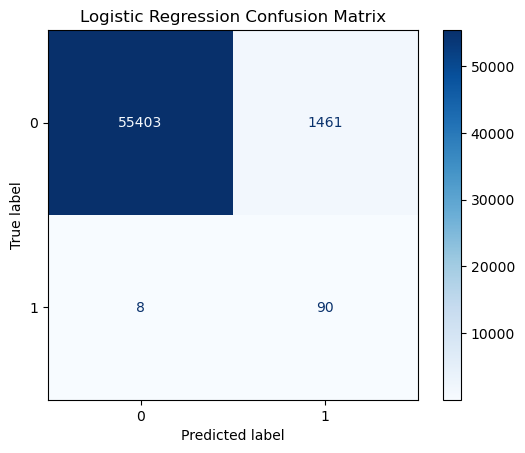

---------------------------------------



In [16]:
# MODEL TRAINING & EVALUATION
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_lr, y_prob_lr, 'Logistic Regression')

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rf, y_prob_rf, 'Random Forest')

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, 'XGBoost')